## Clustering

This notebook uses K-Shapes clustering to cluster electricity usage data by meteringpoint_id

In [239]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [240]:
cwd = os.getcwd()
DATA_DIR = os.path.join(cwd, '..', 'data')
INT_DATA_DIR = os.path.join(cwd, '..', 'data', 'interim')
RAW_DATA_DIR = os.path.join(cwd, '..', 'data', 'raw')

In [241]:
def load_interim_data():
    """Load all required CSV files"""
    consumptions = pd.read_csv(os.path.join(INT_DATA_DIR,'merged.csv'))
    norm = pd.read_csv(os.path.join(INT_DATA_DIR,'norm_merged.csv'))
    
    # Convert timestamp columns to datetime
    consumptions['validfrom'] = pd.to_datetime(consumptions['validfrom'])
    norm['validfrom'] = pd.to_datetime(norm['validfrom'])
    
    return consumptions, norm

In [242]:
consumptions_df , norm_df = load_interim_data()

In [243]:
consumptions_df

,meteringpoint_id,validfrom,quantity,weatherstation_id,air_temp,ghi,cloud_opacity,precipitable_water,price
0,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:00:00+00:00,0.156,8e35e073-450e-4a74-ba6f-368caf10fab2,3,0,70.4,16.5,0.01
1,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:15:00+00:00,0.306,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,73.9,16.2,0.01
2,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:30:00+00:00,0.211,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,73.6,15.8,0.01
3,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:45:00+00:00,0.184,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,73.6,15.5,0.01
4,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 01:00:00+00:00,0.523,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,82.7,15.3,0.02
...,...,...,...,...,...,...,...,...,...
444155,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 22:45:00+00:00,0.002,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,11,0,83.5,16.3,93.82
444156,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 23:00:00+00:00,0.001,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,8,0,38.9,16.2,96.44
444157,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 23:15:00+00:00,0.002,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,8,0,33.5,16.1,96.44
444158,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 23:30:00+00:00,0.001,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,8,0,30.5,15.9,96.44


In [244]:
norm_df

,meteringpoint_id,validfrom,quantity,weatherstation_id,air_temp,ghi,cloud_opacity,precipitable_water,price,quantity_norm,air_temp_norm,ghi_norm,cloud_opacity_norm,precipitable_water_norm,price_norm
0,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:00:00+00:00,0.156,8e35e073-450e-4a74-ba6f-368caf10fab2,3,0,70.4,16.5,0.01,-0.519185,-1.239879,-0.668453,1.143302,-0.575866,-1.466188
1,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:15:00+00:00,0.306,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,73.9,16.2,0.01,-0.356509,-1.367669,-0.668453,1.258942,-0.606481,-1.466188
2,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:30:00+00:00,0.211,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,73.6,15.8,0.01,-0.459537,-1.367669,-0.668453,1.249030,-0.647302,-1.466188
3,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 00:45:00+00:00,0.184,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,73.6,15.5,0.01,-0.488819,-1.367669,-0.668453,1.249030,-0.677917,-1.466188
4,261b7930-dd7e-43f0-8a42-4f31d97f9edb,2024-01-01 01:00:00+00:00,0.523,8e35e073-450e-4a74-ba6f-368caf10fab2,2,0,82.7,15.3,0.02,-0.121171,-1.367669,-0.668453,1.549695,-0.698327,-1.465986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444155,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 22:45:00+00:00,0.002,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,11,0,83.5,16.3,93.82,-0.231527,-0.467599,-0.684821,1.625643,-0.614117,0.433133
444156,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 23:00:00+00:00,0.001,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,8,0,38.9,16.2,96.44,-0.233777,-0.832801,-0.684821,0.140774,-0.624070,0.486179
444157,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 23:15:00+00:00,0.002,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,8,0,33.5,16.1,96.44,-0.231527,-0.832801,-0.684821,-0.039008,-0.634023,0.486179
444158,eba9a77e-589f-4c63-b7d2-8506c0cb8a59,2024-10-31 23:30:00+00:00,0.001,ad2b2253-861e-4971-94d4-a8fd5a4bd8f7,8,0,30.5,15.9,96.44,-0.233777,-0.832801,-0.684821,-0.138887,-0.653930,0.486179


## Forecastability

The following code uses Time Series forecasting to cluster groups by forecastability

In [246]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from tqdm import tqdm

class IntermittentProfiling:
    """Class for handling intermittent profiling of consumption data."""

    @staticmethod
    def calculate_intervals_between_nonzero(consumption, timestamps):
        """
        Calculate intervals between non-zero consumption events in hours.
        
        Args:
            consumption: numpy array of consumption values
            timestamps: numpy array of timestamps in nanoseconds
        """
        consumption = np.array(consumption)
        timestamps = np.array(timestamps)
        
        # Find non-zero consumption events
        nonzero_mask = consumption > 0
        
        if np.sum(nonzero_mask) <= 1:
            return np.array([0])
        
        # Get timestamps of non-zero events
        nonzero_times = timestamps[nonzero_mask]
        
        # Calculate intervals in hours
        intervals = np.diff(nonzero_times) / (1e9 * 3600)  # Convert nanoseconds to hours
        return intervals

    @staticmethod
    def calculate_cv2(array, highest=0.05, lowest=0.05):
        """Calculate squared coefficient of variation with winsorization."""
        winsorized_array = winsorize(array, (highest, lowest))
        cv2 = (np.std(winsorized_array) / np.mean(winsorized_array))**2
        return cv2

    @staticmethod
    def calculate_adi(array, highest=0.05, lowest=0.05):
        """Calculate Average Demand Interval with winsorization."""
        if len(array) <= 1:
            return 0
        winsorized_array = winsorize(array, (highest, lowest))
        adi = np.mean(winsorized_array)
        return adi

    @staticmethod
    def calculate_sddi(array, highest=0.05, lowest=0.05):
        """Calculate Standard Deviation of Demand Intervals with winsorization."""
        if len(array) <= 1:
            return 0
        winsorized_array = winsorize(array, (highest, lowest))
        sddi = np.std(winsorized_array)
        return sddi

    @staticmethod
    def compute_meter_metrics(df, meter_id, quantity_col='quantity', timestamp_col='validfrom'):
        """Compute profiling metrics for a single meter."""
        meter_data = df[df['meteringpoint_id'] == meter_id].copy()
        meter_data = meter_data.sort_values(timestamp_col)
        
        consumption = np.array(meter_data[quantity_col])
        timestamps = np.array(meter_data[timestamp_col].astype(np.int64))
        
        intervals = IntermittentProfiling.calculate_intervals_between_nonzero(consumption, timestamps)
        
        return {
            'meteringpoint_id': meter_id,
            'cv2': IntermittentProfiling.calculate_cv2(consumption),
            'adi': IntermittentProfiling.calculate_adi(intervals),
            'sddi': IntermittentProfiling.calculate_sddi(intervals),
            'mean_consumption': np.mean(consumption),
            'std_consumption': np.std(consumption),
            'zero_consumption_ratio': np.sum(consumption == 0) / len(consumption)
        }

    @staticmethod
    def classify_consumption_profile(metrics, 
                                    thres_cv2_constant=0.1,
                                    thres_cv2=0.5,
                                    thres_adi=0.28,
                                    thres_sddi=0.4,
                                    zero_threshold=0.8):
        if metrics['zero_consumption_ratio'] > zero_threshold and metrics['cv2'] < thres_cv2_constant:
            return 'constant_zero'
        elif metrics['cv2'] < thres_cv2_constant and metrics['adi'] > thres_adi:
            return 'constant_zero'
        elif metrics['cv2'] < thres_cv2_constant:
            return 'constant'
        elif metrics['cv2'] >= thres_cv2 and metrics['adi'] >= thres_adi:
            return 'lumpy'
        elif metrics['cv2'] >= thres_cv2:
            return 'erratic'
        elif metrics['sddi'] >= thres_sddi:
            return 'unforecastable_time'
        elif metrics['adi'] >= thres_adi:
            return 'spikes'
        else:
            return 'regular'
        
    @staticmethod
    def classify_all_profiles(metrics_df,
                          thres_cv2_constant=1.5,
                          thres_cv2=3.5,          
                          thres_adi=0.28,          
                          thres_sddi=0.06,      
                          zero_threshold=0.35):  
        """Classify all consumption profiles in the metrics DataFrame."""
        metrics_df['profile'] = metrics_df.apply(
            lambda row: IntermittentProfiling.classify_consumption_profile(
                row,
                thres_cv2_constant,
                thres_cv2,
                thres_adi,
                thres_sddi,
                zero_threshold
            ),
            axis=1
        )
        return metrics_df


    @staticmethod
    def print_profile_distribution(profiles_df):
        """Print summary of profile distribution."""
        print("\nProfile Distribution:")
        profile_counts = profiles_df['profile'].value_counts()
        for profile, count in profile_counts.items():
            percentage = count / len(profiles_df) * 100
            print(f"{profile}: {count} meters ({percentage:.1f}%)")

    @staticmethod
    def profile_consumption_data(df):
        """Main function to profile electricity consumption data."""
        print("Computing profile metrics...")
        
        metrics_list = []
        for meter_id in tqdm(df['meteringpoint_id'].unique()):
            metrics = IntermittentProfiling.compute_meter_metrics(df, meter_id)
            metrics_list.append(metrics)
        
        metrics_df = pd.DataFrame(metrics_list)
        
        print("\nMetric Statistics:")
        print(metrics_df[['cv2', 'adi', 'sddi', 'zero_consumption_ratio']].describe())
        
        print("\nClassifying profiles...")
        profiles_df = IntermittentProfiling.classify_all_profiles(metrics_df)
        
        IntermittentProfiling.print_profile_distribution(profiles_df)
        return profiles_df


In [247]:
profiles_df = IntermittentProfiling.profile_consumption_data(consumptions_df)


Computing profile metrics...


100%|██████████| 20/20 [00:00<00:00, 49.09it/s]


Metric Statistics:
             cv2        adi       sddi  zero_consumption_ratio
count  20.000000  20.000000  20.000000               20.000000
mean    2.146440   0.260264   0.017641                0.135854
std     2.343646   0.033175   0.034088                0.119846
min     0.528272   0.250000   0.000000                0.000000
25%     0.884448   0.250000   0.000000                0.051088
50%     1.462111   0.250000   0.000000                0.104364
75%     2.421211   0.253206   0.013788                0.231211
max    11.014797   0.399079   0.122659                0.373566

Classifying profiles...

Profile Distribution:
constant: 9 meters (45.0%)
regular: 7 meters (35.0%)
erratic: 3 meters (15.0%)
constant_zero: 1 meters (5.0%)


In [248]:
profiles_df

,meteringpoint_id,cv2,adi,sddi,mean_consumption,std_consumption,zero_consumption_ratio,profile
0,261b7930-dd7e-43f0-8a42-4f31d97f9edb,1.955900,0.250000,0.000000,0.634728,0.922060,0.000000,regular
1,32d6224d-820c-40be-9717-2b3ecf374ec3,1.808770,0.265295,0.059915,0.340383,0.505372,0.079424,regular
2,41ee7d78-7af0-438b-a1b2-247ec2a657fb,1.681492,0.250000,0.000000,0.319351,0.535302,0.121567,regular
3,420d4f05-b0e2-43a3-90ff-c6c59a096dd2,1.687582,0.250000,0.000000,0.399683,0.565031,0.128210,regular
4,6693d5ac-7a00-479f-83d4-5a4c14aaca4e,0.900221,0.263564,0.056631,0.075659,0.096934,0.196197,constant
5,6bafc18f-d684-42ea-90b6-4697a9818bd2,1.095608,0.250000,0.000000,0.037334,0.084309,0.298616,constant
6,79df21f8-74a5-4510-834b-63bc547be7fd,4.154552,0.250000,0.000000,0.282828,0.658619,0.087161,erratic
7,7b22a6c1-dddb-4afd-9f86-53daae36f678,0.970456,0.250000,0.000000,0.047699,0.055184,0.346650,constant
8,807a2d12-f1e5-4ac6-8326-a875743d7ff0,0.528272,0.250000,0.000000,0.331015,0.461979,0.002459,constant
9,8764712a-3566-44f8-b6f1-d94c289dc815,3.235237,0.250000,0.000000,0.445175,0.884831,0.044806,regular


In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_classification_results(profiles_df, thres_cv2_constant, thres_cv2, thres_adi, thres_sddi, zero_threshold):
    """
    Visualize classification results to help determine the best threshold values.
    """
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    axes = axes.flatten()

    # Distribution of CV2
    sns.histplot(profiles_df['cv2'], bins=10, kde=False, ax=axes[0])
    axes[0].axvline(thres_cv2_constant, color='green', linestyle='--', label='Constant Threshold (CV2)')
    axes[0].axvline(thres_cv2, color='red', linestyle='--', label='Erratic Threshold (CV2)')
    axes[0].set_title('Distribution of CV2')
    axes[0].set_xlabel('CV2 (Squared Coefficient of Variation)')
    axes[0].set_ylabel('Count')
    axes[0].legend()

    # Distribution of ADI
    sns.histplot(profiles_df['adi'], bins=10, kde=False, ax=axes[1])
    axes[1].axvline(thres_adi, color='red', linestyle='--', label='ADI Threshold')
    axes[1].set_title('Distribution of ADI')
    axes[1].set_xlabel('ADI (Average Demand Interval)')
    axes[1].set_ylabel('Count')
    axes[1].legend()

    # Distribution of SDDI
    sns.histplot(profiles_df['sddi'], bins=10, kde=False, ax=axes[2])
    axes[2].axvline(thres_sddi, color='blue', linestyle='--', label='SDDI Threshold')
    axes[2].set_title('Distribution of SDDI')
    axes[2].set_xlabel('SDDI (Standard Deviation of Demand Interval)')
    axes[2].set_ylabel('Count')
    axes[2].legend()

    # Distribution of Zero Consumption Ratio
    sns.histplot(profiles_df['zero_consumption_ratio'], bins=10, kde=False, ax=axes[3])
    axes[3].axvline(zero_threshold, color='red', linestyle='--', label='Zero Consumption Threshold')
    axes[3].set_title('Distribution of Zero Consumption Ratio')
    axes[3].set_xlabel('Zero Consumption Ratio')
    axes[3].set_ylabel('Count')
    axes[3].legend()

    # Scatter plot of CV2 vs ADI with profiles
    sns.scatterplot(x='cv2', y='adi', hue='profile', data=profiles_df, ax=axes[4], palette='tab10')
    axes[4].axvline(thres_cv2_constant, color='green', linestyle='--', label='Constant Threshold (CV2)')
    axes[4].axvline(thres_cv2, color='red', linestyle='--', label='Erratic Threshold (CV2)')
    axes[4].axhline(thres_adi, color='blue', linestyle='--', label='ADI Threshold')
    axes[4].set_title('CV2 vs ADI (Profiles Highlighted)')
    axes[4].set_xlabel('CV2')
    axes[4].set_ylabel('ADI')
    axes[4].legend()

    # Bar chart of profile distribution
    profile_counts = profiles_df['profile'].value_counts()
    sns.barplot(x=profile_counts.index, y=profile_counts.values, ax=axes[5])
    axes[5].set_title('Profile Distribution')
    axes[5].set_xlabel('Profile')
    axes[5].set_ylabel('Count')
    axes[5].set_xticklabels(axes[5].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


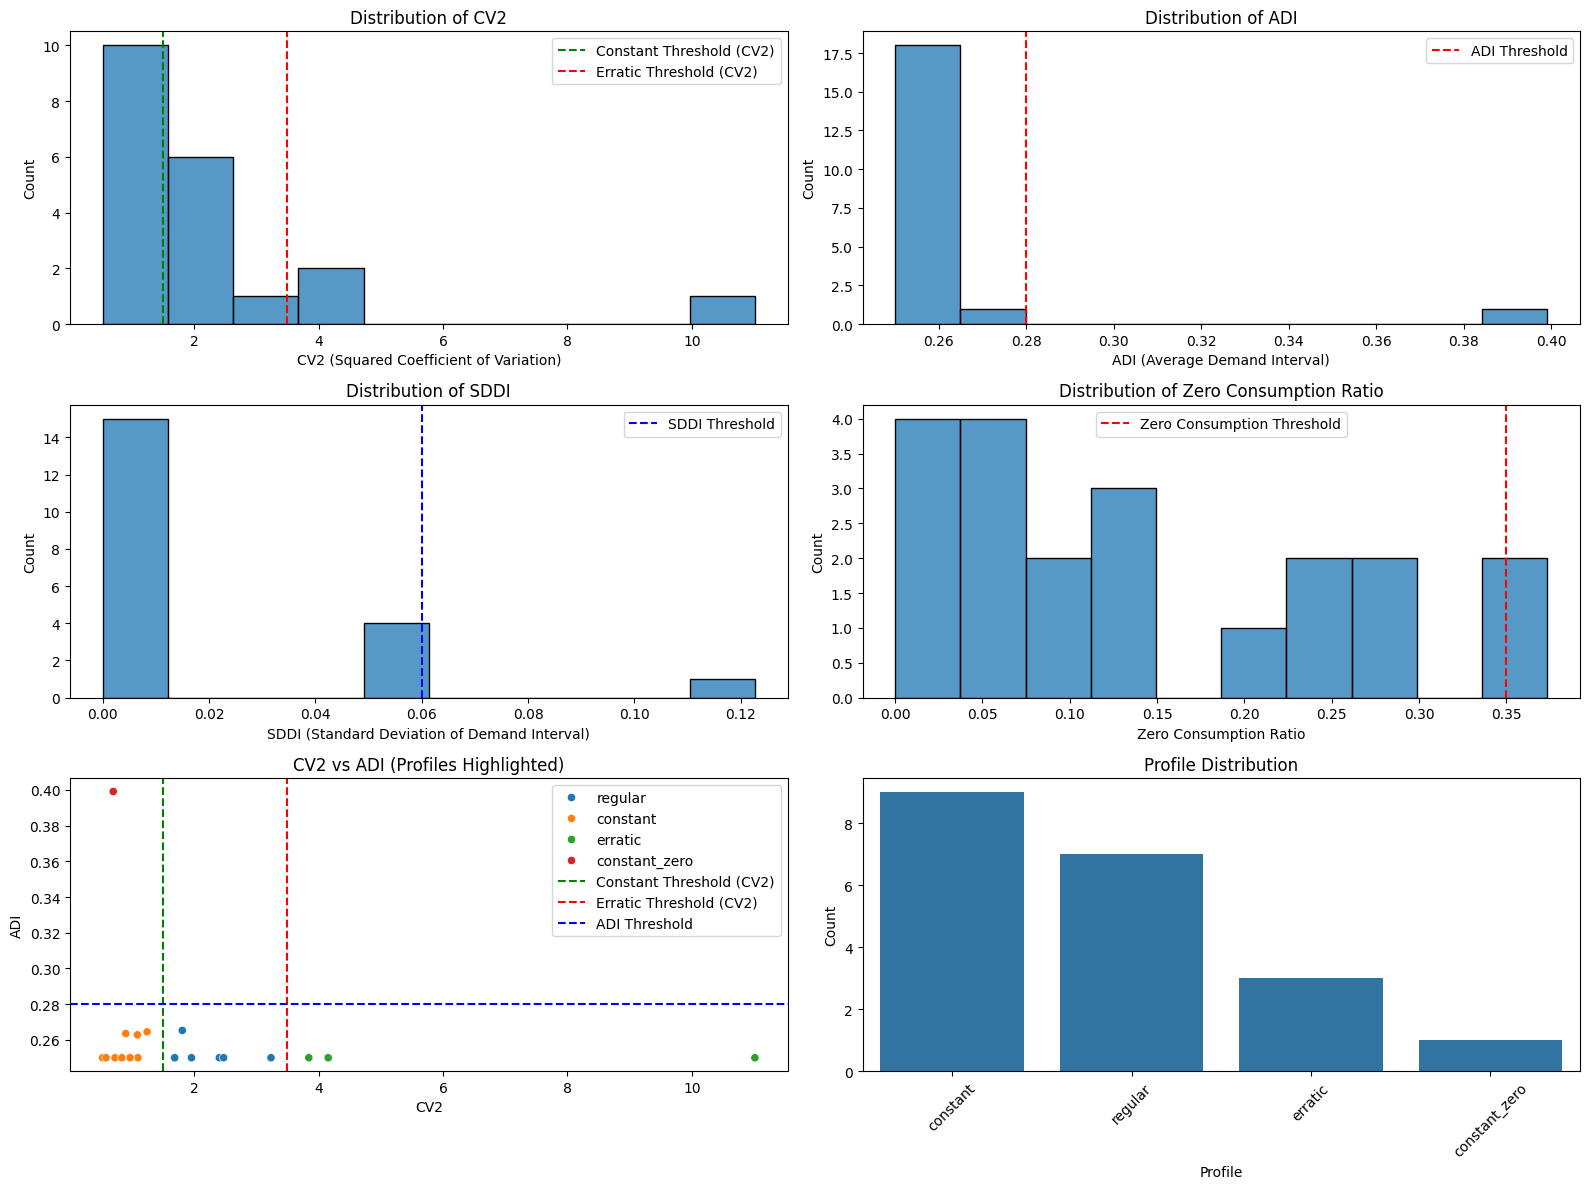

In [250]:
visualize_classification_results(
    profiles_df=profiles_df,
    thres_cv2_constant=1.5,
    thres_cv2=3.5,
    thres_adi=0.28,
    thres_sddi=0.06,
    zero_threshold=0.35
)

### Simplified Summary of Consumption Profiles:

1. **Constant**  
   - **What it Means**: Steady and predictable usage.  
   - **Key Signs**: Low variability (CV2), frequent usage (low ADI), rarely zero usage.  
   - **Rule**: CV2 is small (below `thres_cv2_constant`).

2. **Constant Zero**  
   - **What it Means**: Rarely uses electricity, mostly idle.  
   - **Key Signs**: Zero usage most of the time, stable when used (low CV2), long gaps between uses (high ADI).  
   - **Rules**:  
     - Zero usage ratio is high (above `zero_threshold`), OR  
     - CV2 is small, and ADI is high.

3. **Erratic**  
   - **What it Means**: Unpredictable and highly variable usage.  
   - **Key Signs**: High variability (CV2), frequent but irregular usage (low ADI).  
   - **Rule**: CV2 is large (above `thres_cv2`), but not lumpy.

4. **Lumpy**  
   - **What it Means**: Infrequent, large bursts of usage.  
   - **Key Signs**: High variability (CV2), long gaps between bursts (high ADI).  
   - **Rules**:  
     - CV2 is large (above `thres_cv2`), AND  
     - ADI is large (above `thres_adi`).

5. **Spikes**  
   - **What it Means**: Steady usage with occasional big bursts.  
   - **Key Signs**: Low variability (CV2), long gaps between spikes (high ADI).  
   - **Rules**:  
     - ADI is large (above `thres_adi`), AND  
     - CV2 is small (below `thres_cv2`).

6. **Unforecastable Time**  
   - **What it Means**: Irregular timing of usage events.  
   - **Key Signs**: Unpredictable time gaps (high SDDI).  
   - **Rule**: SDDI is large (above `thres_sddi`).

7. **Regular**  
   - **What it Means**: Balanced and regular usage that doesn’t fit other types.  
   - **Key Signs**: Moderate or low variability (CV2), consistent timing (low ADI, SDDI).  
   - **Rule**: Default if no other rules apply.

In [251]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_profile_examples_one_month(profiles_df, consumptions_df, quantity_col='quantity', timestamp_col='validfrom', month_start='2023-01-01', month_end='2023-01-31'):
    """
    Plot an example of each profile type for a single month.

    """

    consumptions_df[timestamp_col] = pd.to_datetime(consumptions_df[timestamp_col])
    
    month_start = pd.Timestamp(month_start).tz_localize('UTC')
    month_end = pd.Timestamp(month_end).tz_localize('UTC')
    
    consumptions_df = consumptions_df[
        (consumptions_df[timestamp_col] >= month_start) &
        (consumptions_df[timestamp_col] <= month_end)
    ]

    profile_types = profiles_df['profile'].unique()
    
    fig, axes = plt.subplots(len(profile_types), 1, figsize=(10, 5 * len(profile_types)))
    if len(profile_types) == 1:
        axes = [axes] 
        

    for i, profile in enumerate(profile_types):

        example_meter = profiles_df[profiles_df['profile'] == profile].iloc[0]
        meter_id = example_meter['meteringpoint_id']
        
        meter_data = consumptions_df[consumptions_df['meteringpoint_id'] == meter_id]
        meter_data = meter_data.sort_values(timestamp_col)
        
        axes[i].plot(meter_data[timestamp_col], meter_data[quantity_col], linestyle='-')
        axes[i].set_title(f"Profile: {profile} (Meter ID: {meter_id}) - {month_start.date()} to {month_end.date()}", fontsize=14)
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Consumption')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()


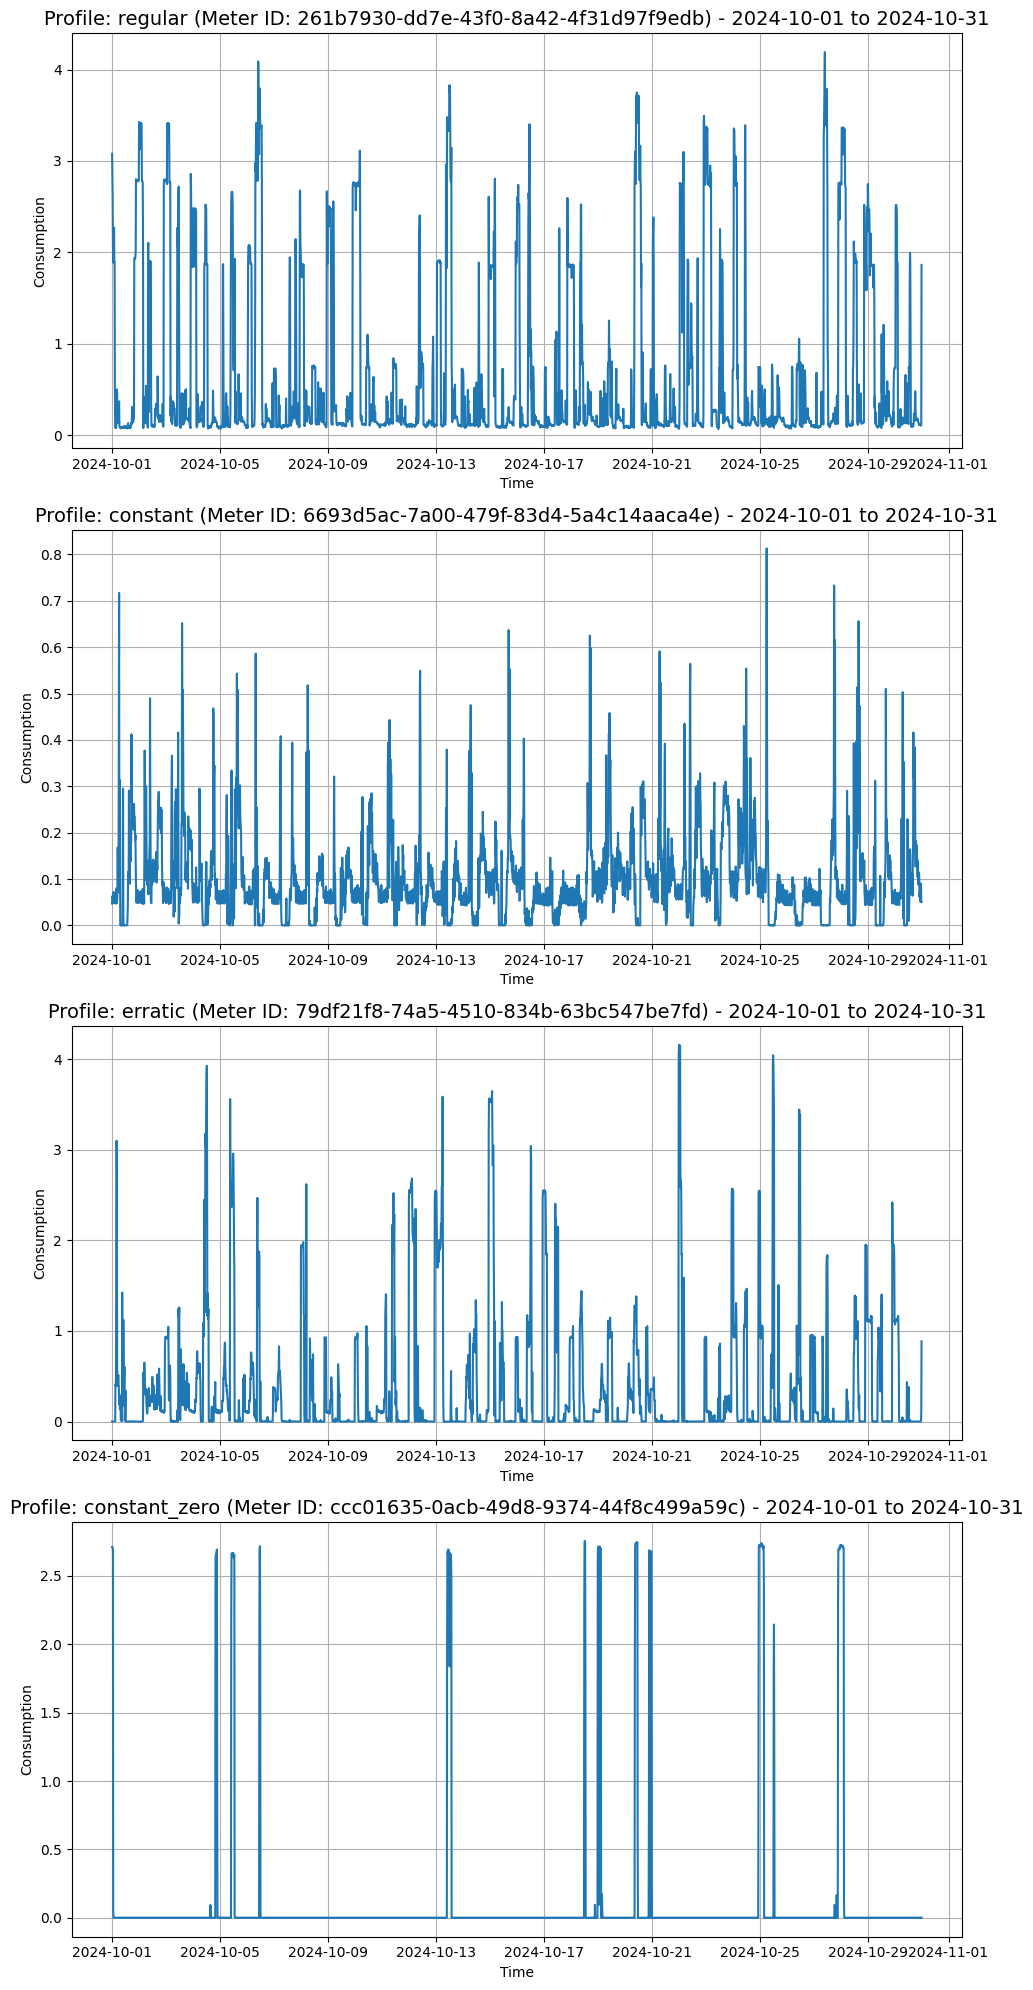

In [252]:
plot_profile_examples_one_month(
    profiles_df=profiles_df,
    consumptions_df=consumptions_df,
    quantity_col='quantity',
    timestamp_col='validfrom',
    month_start='2024-10-01',
    month_end='2024-10-31'
)


In [ ]:
from aeon.clustering import TimeSeriesKShape
import numpy as np
import pandas as pd
from tqdm import tqdm

def prepare_data_for_kshapes(df, feature='quantity_norm'):
    """
    Prepare normalized data for K-shapes clustering.
    
    Args:
        df (pd.DataFrame): Input DataFrame with normalized features
        feature (str): Feature to use for clustering
        
    Returns:
        tuple: (X array for clustering, list of unique meter IDs)
    """
    print("Getting unique meter IDs...")
    meter_ids = sorted(df['meteringpoint_id'].unique())
    
    # Initialize array for time series data
    n_meters = len(meter_ids)
    n_timesteps = df.groupby('meteringpoint_id').size().max()
    
    print(f"Preparing data array for {n_meters} meters, {n_timesteps} timesteps...")
    # Change shape to (n_cases, n_timepoints) for univariate time series
    X = np.zeros((n_meters, n_timesteps))
    
    # Fill the array with data for each meter
    for i, meter_id in tqdm(enumerate(meter_ids), 
                           total=len(meter_ids), 
                           desc="Preparing meter data"):
        meter_data = df[df['meteringpoint_id'] == meter_id][feature].values
        X[i, :len(meter_data)] = meter_data
    
    return X, meter_ids

def perform_kshapes_clustering(X, n_clusters=2, random_state=42):
    """
    Perform K-shapes clustering using aeon's TimeSeriesKShape.
    
    Args:
        X (np.array): 2D array of shape (n_cases, n_timepoints)
        n_clusters (int): Number of clusters
        random_state (int): Random seed for reproducibility
        
    Returns:
        tuple: (cluster assignments, model)
    """
    print(f"\nStarting K-shapes clustering with {n_clusters} clusters...")
    
    # Initialize and fit model
    model = TimeSeriesKShape(
        n_clusters=n_clusters,
        n_init=10,
        max_iter=300,
        tol=0.0001,
        verbose=True,
        random_state=random_state
    )
    clusters = model.fit_predict(X)
    
    print("Clustering completed!")
    return clusters, model

def create_cluster_output(meter_ids, clusters):
    """Create DataFrame with cluster assignments."""
    return pd.DataFrame({
        'meteringpoint_id': meter_ids,
        'cluster': clusters
    })

def analyze_clusters(df, cluster_assignments):
    """Analyze the characteristics of each cluster."""
    print("\nAnalyzing clusters...")
    df_with_clusters = df.merge(cluster_assignments, on='meteringpoint_id')
    
    print("\nCluster Analysis:")
    print("-" * 50)
    
    for cluster in sorted(df_with_clusters['cluster'].unique()):
        cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster]
        n_meters = cluster_data['meteringpoint_id'].nunique()
        
        print(f"\nCluster {cluster}:")
        print(f"Number of meters: {n_meters}")
        print(f"Percentage of total: {(n_meters / len(cluster_assignments) * 100):.1f}%")
        
        # Calculate hourly patterns
        hourly_stats = (cluster_data
                       .assign(hour=lambda x: x['validfrom'].dt.hour)
                       .groupby('hour')
                       .agg({'quantity': ['mean', 'std']})
                       .round(3))
        
        print("\nHourly Consumption Pattern:")
        print(hourly_stats)
        
        # Price sensitivity
        price_corr = cluster_data.groupby('meteringpoint_id').apply(
            lambda x: x['quantity'].corr(x['price'])).mean()
        print(f"\nAverage price correlation: {price_corr:.3f}")
        
        # Sample meters
        print("\nSample meters from this cluster:")
        print(cluster_data['meteringpoint_id'].unique()[:5])